# Loading and Viewing

In [1]:
!pip install tensorflow

In [2]:
import numpy as np  # Arrays, matrices and functions on them. Required by Pandas, below
import pandas as pd # A data analysis library
from sklearn.model_selection import train_test_split # scikit-learn, machine learning tools
import matplotlib.pyplot as plt # A plotting library
import seaborn as sns # Built on matplotlib, facilitates aesthetically pleasing plots
import tensorflow as tf # Fast numerical computation for machine learning, computations on GPU or CPU
import tensorflow.keras as keras # High-level interface to TensorFlow, making it easier to create neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import time

In [3]:
# General settings
sns.set_style('whitegrid') # Plots will have a white grid
# Variables that will help us work with the classes
class_names = ['hit', 'miss']
class_colors = ['darkorange', 'steelblue']

In [4]:
def load_data(filename):
    hits_df = pd.read_csv(filename, header=None) # Use Pandas to load the data into a Pandas DataFrame
    print('Loaded from', filename)
    hits_data = hits_df.values # Convert from a Pandas DataFrame to a numpy array
    print('The shape of hits_data is', hits_data.shape)
    print('Number of samples of class 0 (hit)', (hits_data[:,0].astype(int) == 0).sum())
    print('Number of samples of class 1 (miss)', (hits_data[:,0].astype(int) == 1).sum())
    print('')
    return hits_data

In [5]:
def plot_data_samples(data, labels, sample_numbers):
    ''' Plot the time series data relating to the input list of sample numbers '''
    # Input format - a list, e.g. [1, 7, 22, 42]
    fig, ax = plt.subplots()

    for i in sample_numbers:
        plt.plot(data[i], label=class_names[labels[i]], color=class_colors[labels[i]])
        print('sample', i, 'class', str(labels[i]), class_names[labels[i]])

    print('')
    plt.ylim([0, 7])
    plt.title('Orange : hit (class 0)\nBlue : miss (class 1)')
    ax.set_ylabel('Accelerometer data')
    ax.set_xlabel('Data point number')

In [6]:
def plot_single_sample(data, sample_number):
    ''' Plot the time series data relating to this sample number. '''
    fig, ax = plt.subplots()
    plt.plot(data[sample_number], color='darkred')
    txt = 'Sample '+str(sample_number)+': Hit or miss?\nDo you recognise the data\'s pattern?'
    plt.suptitle(txt)
    ax.set_ylabel('Standardised x-axis accelerometer data')
    ax.set_xlabel('Data point number')

In [7]:
filename = 'BatHits_TSD.csv'
hits_data = load_data(filename) # This is a function that we created earlier in this notebook

Loaded from BatHits_TSD.csv
The shape of hits_data is (39, 201)
Number of samples of class 0 (hit) 14
Number of samples of class 1 (miss) 25



In [8]:
# Print information about the data's shape and size
print('The hits_data is a matrix. These are the first 7 rows and 5 columns of hits_data:\n', hits_data[:7, :5], '\n')

labels = hits_data[:,0].astype(int)
data = hits_data[:,1:]
print('The shape of the data matrix is', data.shape)
print('The shape of the labels vector is', labels.shape)

The hits_data is a matrix. These are the first 7 rows and 5 columns of hits_data:
 [[0.   0.94 0.97 0.95 0.98]
 [0.   1.12 1.03 1.12 1.2 ]
 [0.   1.11 1.06 0.99 0.98]
 [0.   1.13 1.19 1.15 1.34]
 [0.   1.   1.12 0.58 0.27]
 [0.   1.16 1.17 1.19 1.21]
 [1.   1.05 1.06 1.05 0.48]] 

The shape of the data matrix is (39, 200)
The shape of the labels vector is (39,)


sample 0 class 0 hit
sample 1 class 0 hit
sample 6 class 1 miss
sample 7 class 1 miss



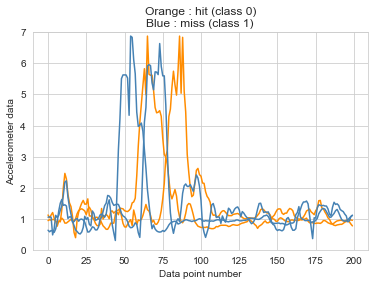

In [9]:
plot_data_samples(data, labels, [0, 1, 6, 7]) ### CHANGE PARAMETER HERE ###

In [10]:
test_size = 10 ### CHANGE PARAMETER HERE ###

data_train, data_test, labels_train, labels_test = train_test_split(
    data, labels, test_size=test_size, random_state=21, stratify=labels)

print('The shape of train_data is', data_train.shape)
print('The shape of test_data is', data_test.shape)
print('Training data:')
print('Number of samples of class 0', (labels_train == 0).sum())
print('Number of samples of class 1', (labels_train == 1).sum())
print('Test data:')
print('Number of samples of class 0', (labels_test == 0).sum())
print('Number of samples of class 1', (labels_test == 1).sum())

The shape of train_data is (29, 200)
The shape of test_data is (10, 200)
Training data:
Number of samples of class 0 10
Number of samples of class 1 19
Test data:
Number of samples of class 0 4
Number of samples of class 1 6


# Building and Training

In [11]:
def plot_comparison(data_train, labels_train, data_test, labels_test, test_sample):
    ''' Plot the given test sample alongside a few training samples of the same class '''
    # Determine the true class of the given sample
    print('Test sample', test_sample, 'true class', str(labels_test[test_sample]), class_names[labels_test[test_sample]])  
    true_class = labels_test[test_sample]

    # Plot data samples that are in the same class
    fig, ax = plt.subplots()
    count = 0
    for i in range(100):
        if labels_train[i] == true_class:
            plt.plot(data_train[i], color=class_colors[labels_train[i]])
            print('Training sample', i, 'class', str(labels_train[i]), class_names[labels_train[i]])
            count = count + 1
            if count > 4:
                break
    plt.ylim([-3.5, 3.5])
    plt.title('Walking on  '+class_names[true_class])
    ax.set_ylabel('Accelerometer data')
    ax.set_xlabel('Data point number')

    # Plot the test data sample
    plt.plot(data_test[test_sample], color='darkred')

In [12]:
def plot_loss(log):
    ''' Plot the loss recorded in the log during model training '''
    ax = log[['loss', 'val_loss']].plot(title='Loss function during training', color=class_colors)
    ax.set_xlabel("Model training epoch")
    ax.set_ylabel("Loss")
    ax.legend(["training", "validation"]);

In [13]:
def plot_accuracy(log):
    ''' Plot the accuracy recorded in the log during model training '''
    ax = log[['accuracy', 'val_accuracy']].plot(title='Accuracy during training', color=class_colors)
    ax.set_xlabel("Model training epoch")
    ax.set_ylabel("Accuracy")
    ax.legend(["training", "validation"]);

In [14]:
def build_model(print_summary=False):
    ''' Return a model with randomly initialised weights '''
    model = Sequential([
        Dense(8, input_dim=input_dim, activation='relu', name='Layer1'), 
        Dense(4, activation='relu', name='Layer2'), 
        Dense(1, activation='sigmoid', name='OutputLayer')
    ])

    optimizer = keras.optimizers.Adam() 
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    if print_summary:
        print(model.summary())
    return model

In [15]:
# The size of the input vector
input_dim = data_train.shape[1]
model = build_model(True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 8)                 1608      
_________________________________________________________________
Layer2 (Dense)               (None, 4)                 36        
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 5         
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
result = model.evaluate(data_test, labels_test, batch_size=5)
print('Pre-training, validation accuracy is', result[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.3333
Pre-training, validation accuracy is 0.4000000059604645


In [17]:
batch_size = 8 ### CHANGE PARAMETER HERE ### 
epochs = 10 ### CHANGE PARAMETER HERE ###

model = build_model() # This re-initialises the model with random weights each time before we train it.

# Train
start = time.time()
hist = model.fit(data_train, labels_train, batch_size=batch_size, epochs=epochs, 
                 validation_data=(data_test, labels_test), verbose=1)
end = time.time()
log = pd.DataFrame(hist.history) 
print('Training complete in', round(end-start), 'seconds')

Epoch 1/10
4/4 [==============================] - 1s 165ms/step - loss: 0.6999 - accuracy: 0.6579 - val_loss: 0.6719 - val_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6843 - accuracy: 0.6454 - val_loss: 0.6565 - val_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6079 - accuracy: 0.7162 - val_loss: 0.6525 - val_accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6482 - accuracy: 0.6579 - val_loss: 0.6474 - val_accuracy: 0.6000
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6315 - accuracy: 0.6800 - val_loss: 0.6416 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6292 - accuracy: 0.6496 - val_loss: 0.6445 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6488 - accuracy: 0.6079 - val_loss: 0.6461 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==========

In [18]:
# Use the trained model to classify the test dataset.
result = model.evaluate(data_test, labels_test, batch_size=batch_size)
print('Validation accuracy:\t', result[1])
print('Validation loss:\t', result[0])
print('test_size:\t', test_size)
print('batch_size:\t', batch_size)
print('epochs:\t\t', epochs)

2/2 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6000
Validation accuracy:	 0.6000000238418579
Validation loss:	 0.6454225778579712
test_size:	 10
batch_size:	 8
epochs:		 10


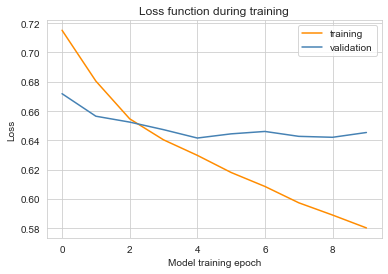

In [19]:
# Plot the training log's loss dxata.
plot_loss(log)

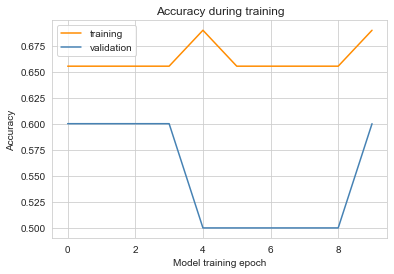

In [20]:
# Plot the training log's accuracy data.
plot_accuracy(log)

In [21]:
sample_num = 3 ### CHANGE PARAMETER HERE ###
data_sample = data_test[sample_num]
data_sample = np.array( [data_sample,] ) # Convert the data sample into the shape expected by the MLP
probability = model.predict(data_sample)
print('Model: probability of belonging to class 1:', probability[0][0])
print('Predicted class:\t', (np.round(probability)[0][0].astype(int))) # \t inserts a tab space into the text
print('True class:\t\t', labels_test[sample_num])

Model: probability of belonging to class 1: 0.50909096
Predicted class:	 1
True class:		 1
